In [1]:
import sys,os,re
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from scipy.stats import bartlett
Delimiter = '\t'

## This section is comparing the distance of copias and gypsies to thier cloest genes

In [2]:
Copia_distance = "/blue/soltis/shan158538/Methylation/OutPut/TE-gene_distance/closest_gene_copia.tab"
Gypsy_distance = "/blue/soltis/shan158538/Methylation/OutPut/TE-gene_distance/closest_gene_gypsy.tab"

In [3]:
Copia_InFile = pd.read_csv(Copia_distance, sep=Delimiter)
Gypsy_InFile = pd.read_csv(Gypsy_distance, sep=Delimiter)

In [4]:
Copia_InFile.head()

,uniqueTE_id,TE.middle.point,Gene.id,Gene.start,Gene.end,Gene.middle.point,Distance
0,ID=162638,24,ID=TragDub17217,9764,12106,10935,10911
1,ID=162639,172,ID=TragDub17217,9764,12106,10935,10763
2,ID=162643,2273,ID=TragDub17217,9764,12106,10935,8662
3,ID=162644,2448,ID=TragDub17217,9764,12106,10935,8487
4,ID=162646,3344,ID=TragDub17217,9764,12106,10935,7591


In [5]:
Gypsy_InFile.head()

,uniqueTE_id,TE.middle.point,Gene.id,Gene.start,Gene.end,Gene.middle.point,Distance
0,ID=162703,59683,ID=TragDub17218,86578,88577,87577,27894
1,ID=162705,60442,ID=TragDub17218,86578,88577,87577,27135
2,ID=162708,61120,ID=TragDub17218,86578,88577,87577,26457
3,ID=162766,116698,ID=TragDub17218,86578,88577,87577,29121
4,ID=162767,118165,ID=TragDub17218,86578,88577,87577,30588


In [6]:
Copia_array = Copia_InFile['Distance'].to_numpy()
Gypsy_array = Gypsy_InFile['Distance'].to_numpy()

### The following is comparing the variance between two TE types. They are not too different from each other (the 4:1 rule).

In [7]:
print(np.var(Copia_array), np.var(Gypsy_array))

1250862928.2018456 1857531505.3567488


### The following is checking the data distribution. Not normally distributed. So I used Wilcoxon rank sum test

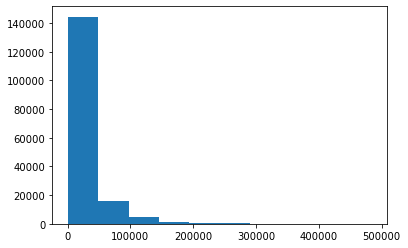

In [8]:
plt.hist(Copia_array)
plt.show() 

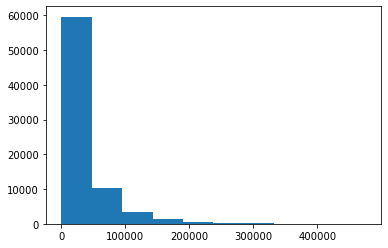

In [9]:
plt.hist(Gypsy_array)
plt.show() 

### The actual Wilcoxon rank sum test. The null hypothesis is that the median in copias is less than that of gypsies.

In [10]:
ranksums(Copia_array, Gypsy_array, alternative = 'less')

RanksumsResult(statistic=-62.37202278624924, pvalue=0.0)

### Some other basic statistics below.

In [11]:
np.mean(Copia_array)

24586.654226367005

In [12]:
np.median(Copia_array)

11710.5

In [13]:
np.mean(Gypsy_array)

33121.348787990326

In [14]:
np.median(Gypsy_array)

17139.0